# Guided Project: Stochastic Gradient Descent on Linear Regression

In [113]:
#  Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [114]:
# Load the data
data = pd.read_csv('crowdness_gym_data.csv')

In [115]:
#Display the first five rows of the dataframe.
data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [116]:
#Print out the number of features and observations in the dataset.
data.shape

(62184, 11)

In [117]:
# Print data types and null counts for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [118]:
# Count the number of nulls.
data.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [119]:
#Describe the data
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


There are no missing values in the data.
There are 11 columns and 62184 observations.
The average number of people is 29, 70% is not weekends, the average temperature is 58.5, and 66% is during the semester. The earliest hour is 7, the latest hour is 23, and the common hour is 12.

C:\Users\The user\AppData\Local\Temp\ipykernel_24468\1423081263.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<AxesSubplot:>

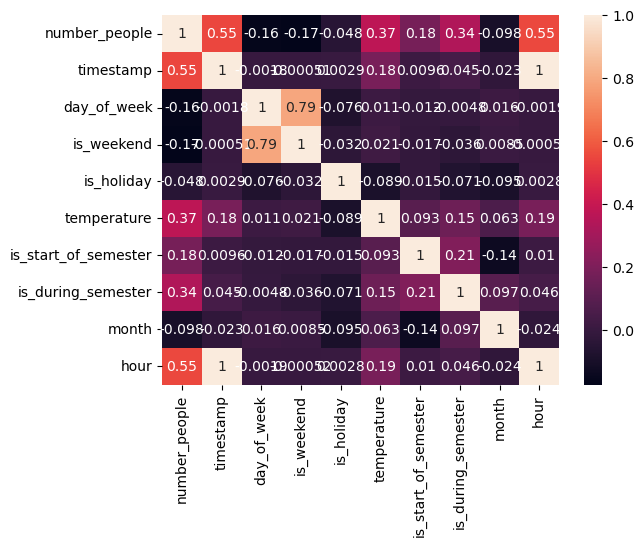

In [120]:
# Find the correlation between all the features, and create a heatmap.
correlation = data.corr()
sns.heatmap(correlation, annot=True)

From the heatmap we see that the hour, timestamp, is_during_semester, and temperature features are correlated with the target.

In [121]:
# save the correlated columns.
corr_data = data[['number_people', 'hour', 'timestamp', 'is_during_semester', 'temperature']]

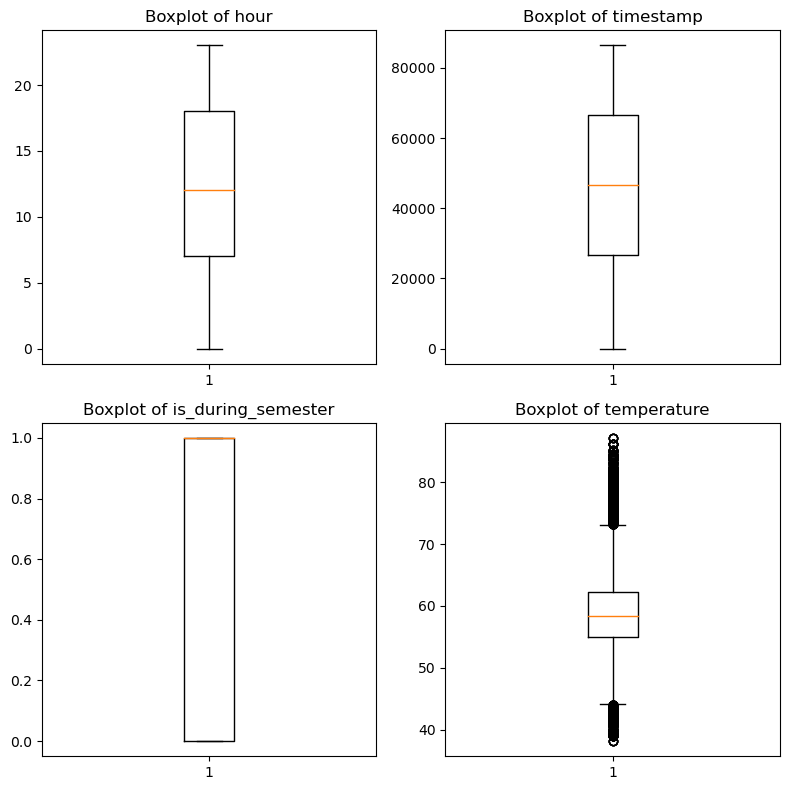

In [122]:
# Plot a boxplot for each correlated column.
num_plots = len(corr_data.columns)
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4*num_rows))

for i, col in enumerate(corr_data.columns[1:]):
    row = i // num_cols
    column = i % num_cols

    if num_rows > 1:
        ax = axes[row, column]
    else:
        ax = axes[column]

    ax.boxplot(corr_data[col])
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

There are many outliers in the temperature column, and in the is_during_semester column most of the values are 1.

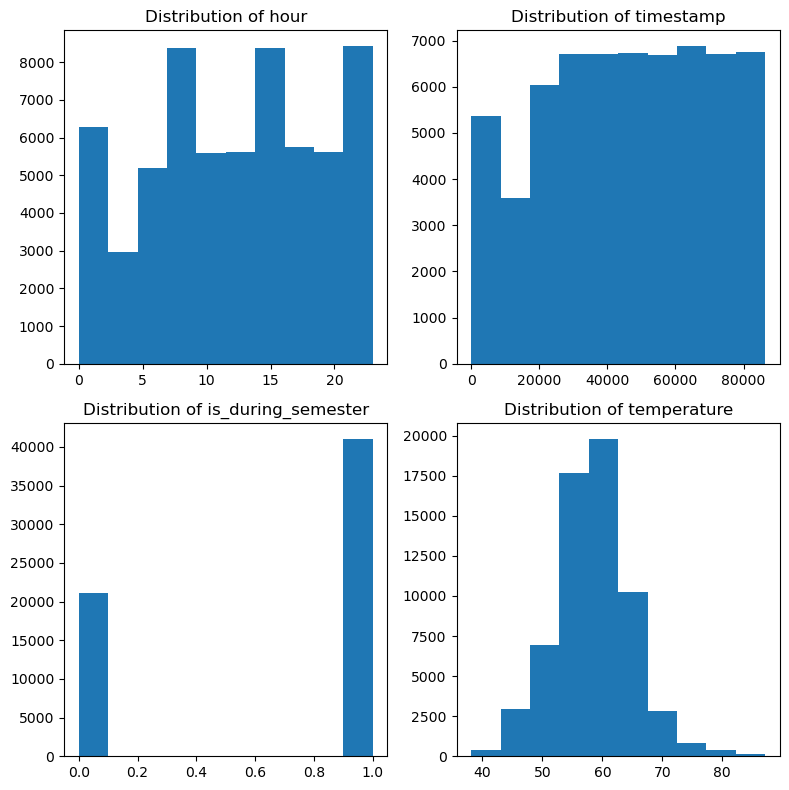

In [123]:
# Plot the distribution of each correlated column.
num_plots = len(corr_data.columns)
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4*num_rows))

for i, col in enumerate(corr_data.columns[1:]):
    row = i // num_cols
    column = i % num_cols

    if num_rows > 1:
        ax = axes[row, column]
    else:
        ax = axes[column]

    ax.hist(corr_data[col])
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [124]:
# Split the data into features and labels.
X = corr_data.drop('number_people', axis = 1)
y = corr_data['number_people']

In [125]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

In [126]:
#Normalize the data.
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [149]:
# Instantiate SGDRegressor model, and fit the train data.
sgd = SGDRegressor(loss= 'huber')
sgd.fit(X_train_scaled, y_train)

SGDRegressor(loss='huber')

Huber loss combines the benefits of mean squared error (MSE) and mean absolute error (MAE). It is more robust to outliers compared to MSE while still considering all errors. Huber loss strikes a balance between smoothness and sparsity and is useful when you want a regression model that is less affected by outliers.
There are outliers in the data, that why I decided to use Huber loss.

In [150]:
# Obtain predictions for test set.
predictions = sgd.predict(X_test_scaled)

In [151]:
# Obtain R Squared Score of test set.
r = sgd.score(X_test_scaled, y_test)
print("R-square score:",r)
# Obtain the RMSE of test set.
RMSE = mean_squared_error(y_test, predictions, squared = False)
print("RMSE:",RMSE)
# Obtain the MAE of test set.
MAE = mean_absolute_error(y_test, predictions)
print("MAE:",MAE)

R-square score: 0.34772159234339806
RMSE: 18.414013909987915
MAE: 14.487961122859343


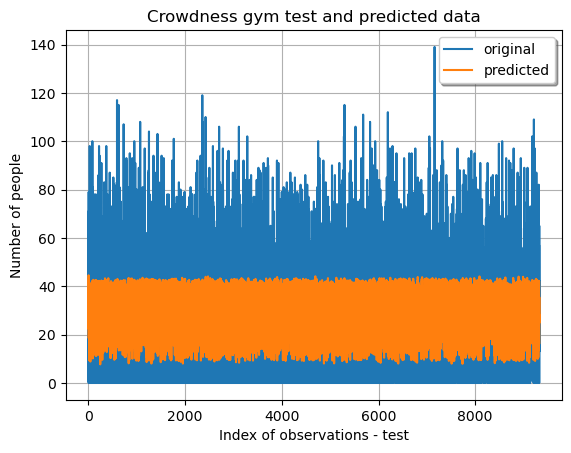

In [152]:
# Create a line plot that incudes a line for the test data and the predictions.
x_ax  = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Crowdness gym test and predicted data")
plt.xlabel('Index of observations - test')
plt.ylabel('Number of people')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

We see that it always predicts lower values than the original data, and also they are not corresponding to the original data, they are in a small range of values.

In [153]:
# Tweak the model, don't use the huber loss parameter.
sgd1 = SGDRegressor()
sgd1.fit(X_train_scaled, y_train)
predictions1 = sgd1.predict(X_test_scaled)
r1 = sgd1.score(X_test_scaled, y_test)
print("R-square score:",r1)

R-square score: 0.46273478466417617


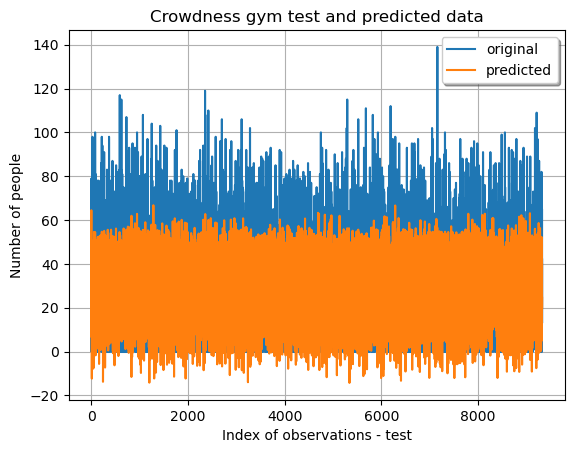

In [154]:
x_ax  = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions1, label="predicted")
plt.title("Crowdness gym test and predicted data")
plt.xlabel('Index of observations - test')
plt.ylabel('Number of people')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

I got a better score when I didn't use the Huber loss parameter, and the plot shows much better correspondence. But the predicted values are going below 0, which not makes sense.

This model isn't doing well, we should try to add features, work with the outliers, and balance the data.